In [75]:
%reset -f
from utils import *
from wavhandler import *
import os
import soundfile as sf
import matplotlib.pyplot as plt

In [77]:
X, y, filenames = get_data(filedir='/home/yannis/data/insects/', target_names=['leafminer_all'],only_names=False)

100%|██████████| 1/1 [00:00<00:00, 12.52it/s]


In [78]:
# peaks = []
# for i in range(len(filenames)): #len(files)
#     data, fs = sf.read(filenames[np.random.randint(0,len(filenames))])#path + files[np.random.randint(0,100)]
    
#     pwr = power_spectral_density(data).pow_amp.values
#     z = power_spectral_density(data, bandpass=True)
#     peaks.append(len(peak_finder(z)))
# #     break
#     plt.figure(figsize=(8,4))
#     plt.subplot(2,1,1)
#     plt.plot(pwr, )
#     plt.subplot(2,1,2)
#     plt.plot(data)
#     if i > 10:
#         break
#     plt.plot(np.linspace(0,F_S/2,129),pwr)
#     plt.autoscale(enable=True, axis='x', tight=True)
#     plt.xlabel('frequency [Hz]')
#     plt.ylabel('Normalized PSD')
#     plt.grid(True)
#     plt.title('Welch Power Spectral Density')
#     break


In [79]:
df = pd.DataFrame(pd.Series(filenames).apply(lambda x: get_wingbeat_timestamp(x)).value_counts())

In [80]:
df['counts'] = df[0]
df['ind'] = df.index

Text(0.5, 1.0, 'Do leafminers fly at night?')

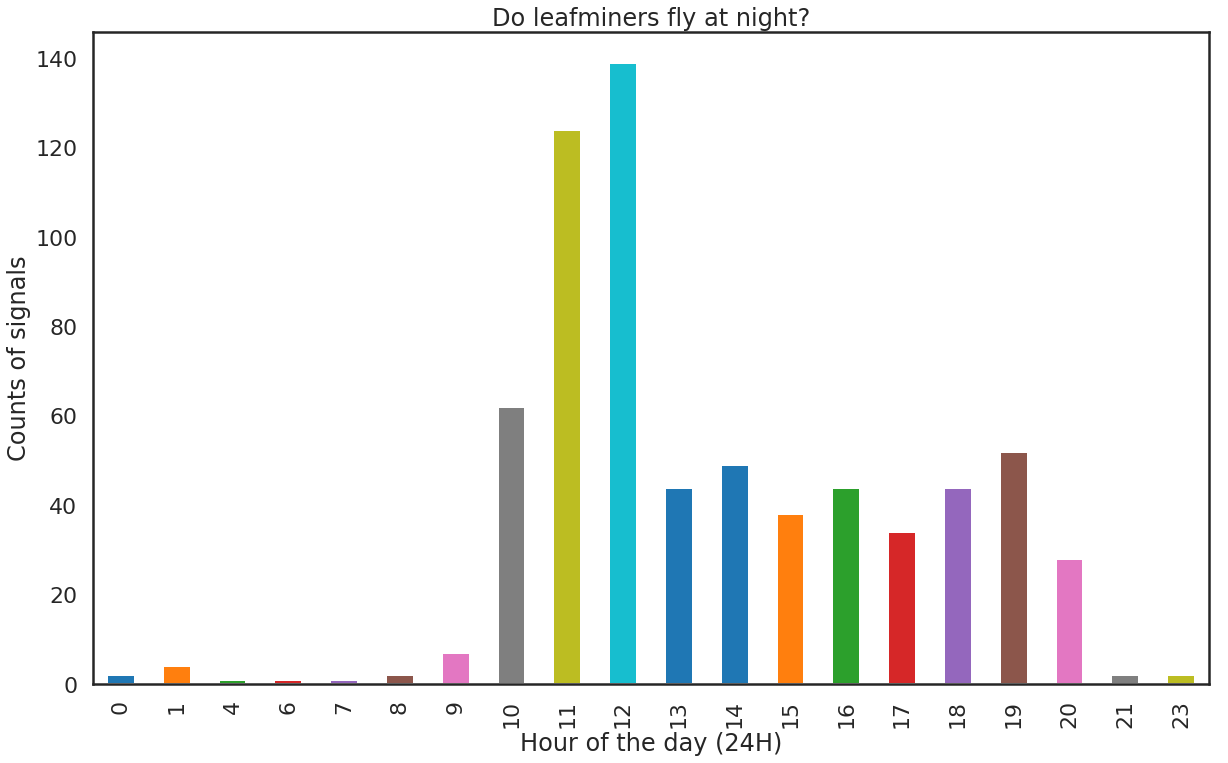

In [81]:
df.counts.sort_index().plot(kind='bar', figsize=(20,12))
plt.ylabel('Counts of signals')
plt.xlabel('Hour of the day (24H)')
plt.title('Do leafminers fly at night?')